In [1]:
%matplotlib inline
%load_ext nengo.ipynb

<IPython.core.display.Javascript object>

In [2]:
import matplotlib.pyplot as plt
import nengo
import seaborn as sns

from cogsci17_decide.networks import DriftDiffusion, UsherMcClelland

In [3]:
sns.set('paper', 'ticks')

col_w = (7. - .25) / 2.

# Usher-McClelland

In [4]:
dt = 0.001

with nengo.Network(seed=1) as model:
    wta = UsherMcClelland(3, 200, dt=dt)
    stimulus = nengo.Node([0.8, 0.7, 0.6])
    nengo.Connection(stimulus, wta.input, synapse=None)
    
    p_stimulus = nengo.Probe(stimulus, synapse=None)
    p_output = nengo.Probe(wta.output, synapse=0.01)

In [5]:
with nengo.Simulator(model, dt=dt) as sim:
    sim.run(1.)

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"
Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


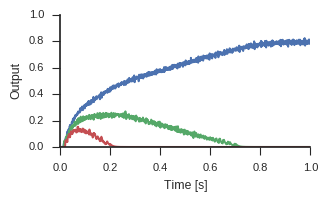

In [6]:
fig = plt.figure(figsize=(col_w, col_w / 1.6))
plt.plot(sim.trange(), sim.data[p_output])
plt.xlabel("Time [s]")
plt.ylabel("Output")
plt.locator_params(axis='y', nbins=5)
sns.despine()
plt.tight_layout()

In [7]:
fig.savefig('../doc/paper/figures/usher-mcclelland.pdf')

# Independent accumulator

In [8]:
dt = 0.001

with nengo.Network(seed=1) as model:
    wta = DriftDiffusion(3, 200, dt=dt)
    stimulus = nengo.Node([0.8, 0.7, 0.6])
    nengo.Connection(stimulus, wta.input, synapse=None)
    
    p_stimulus = nengo.Probe(stimulus, synapse=None)
    p_state = nengo.Probe(wta.x.output, synapse=0.01)
    p_output = nengo.Probe(wta.output, synapse=0.01)

In [9]:
with nengo.Simulator(model, dt=dt) as sim:
    sim.run(1.)

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"
Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


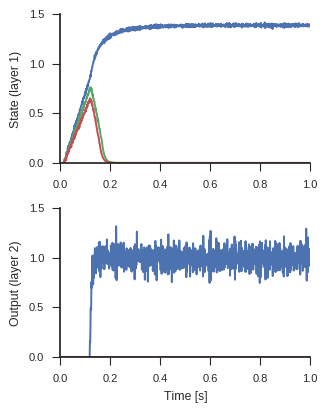

In [10]:
fig = plt.figure(figsize=(col_w, 2. * col_w / 1.6))

ax = plt.subplot(2, 1, 1)
plt.plot(sim.trange(), sim.data[p_state])
plt.locator_params(axis='y', nbins=5)
plt.ylabel("State (layer 1)")

plt.subplot(2, 1, 2, sharex=ax, sharey=ax)
plt.plot(sim.trange(), sim.data[p_output])
plt.locator_params(axis='y', nbins=5)
plt.xlabel("Time [s]")
plt.ylabel("Output (layer 2)")
sns.despine()


plt.tight_layout()

In [11]:
fig.savefig('../doc/paper/figures/indacc.pdf')

# Usher-McClelland with noise

In [57]:
dt = 0.001

with nengo.Network(seed=1) as model:
    wta = UsherMcClelland(3, 200, dt=dt)
    stimulus = nengo.Node([0.8, 0.7, 0.6])
    nengo.Connection(stimulus, wta.input, synapse=None)
    
    noise = nengo.Node(nengo.processes.WhiteNoise(
        nengo.dists.Gaussian(.0, 0.045)), size_out=3)
    nengo.Connection(noise, wta.input, synapse=None)
    
    p_stimulus = nengo.Probe(stimulus, synapse=None)
    p_output = nengo.Probe(wta.output, synapse=0.01)

In [58]:
with nengo.Simulator(model, dt=dt) as sim:
    sim.run(1.)

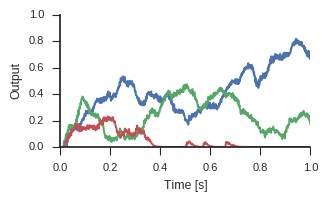

In [59]:
fig = plt.figure(figsize=(col_w, col_w / 1.6))
plt.plot(sim.trange(), sim.data[p_output])
plt.xlabel("Time [s]")
plt.ylabel("Output")
plt.locator_params(axis='y', nbins=5)
sns.despine()
plt.tight_layout()

# Independent accumulators with noise

In [60]:
dt = 0.001

with nengo.Network(seed=1) as model:
    wta = DriftDiffusion(3, 200, dt=dt)
    stimulus = nengo.Node([0.8, 0.7, 0.6])
    nengo.Connection(stimulus, wta.input, synapse=None)
    
    noise = nengo.Node(nengo.processes.WhiteNoise(
        nengo.dists.Gaussian(.0, 0.045)), size_out=3)
    nengo.Connection(noise, wta.input, synapse=None)
    
    p_stimulus = nengo.Probe(stimulus, synapse=None)
    p_state = nengo.Probe(wta.x.output, synapse=0.01)
    p_output = nengo.Probe(wta.output, synapse=0.01)

In [61]:
with nengo.Simulator(model, dt=dt) as sim:
    sim.run(1.)

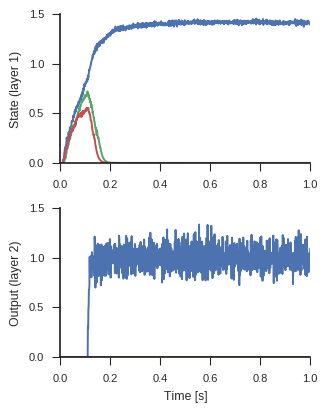

In [63]:
fig = plt.figure(figsize=(col_w, 2. * col_w / 1.6))

ax = plt.subplot(2, 1, 1)
plt.plot(sim.trange(), sim.data[p_state])
plt.locator_params(axis='y', nbins=5)
plt.ylabel("State (layer 1)")

plt.subplot(2, 1, 2, sharex=ax, sharey=ax)
plt.plot(sim.trange(), sim.data[p_output])
plt.locator_params(axis='y', nbins=5)
plt.xlabel("Time [s]")
plt.ylabel("Output (layer 2)")
sns.despine()


plt.tight_layout()